# K-Formal Concept Analysis (K-FCA) Tutorial

This notebook provides an interactive introduction to K-valued Formal Concept Analysis.

## What is K-FCA?

K-FCA generalizes classical Formal Concept Analysis to handle:
- **Continuous data** (real-valued attributes)
- **Multi-valued data** (degrees of membership)
- **Fuzzy data** (uncertainty)

Instead of binary relations, K-FCA uses **idempotent semirings** to represent degrees of membership.

In [1]:
# Setup
import sys
sys.path.insert(0, '..')

import numpy as np
from src.context import KValuedContext
from src.galois import GaloisConnection
from src.lattice import ConceptLattice
from src.semirings import BooleanSemiring
from src.visualization import plot_context, plot_lattice

import matplotlib.pyplot as plt
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


## Example 1: Boolean FCA (Standard FCA)

Let's start with standard Formal Concept Analysis as a special case of K-FCA.

In [2]:
# Define a simple context
objects = ["1", "2", "3", "4", "5"]
attributes = ["a", "b", "c", "d"]

# Binary incidence relation
relation = np.array([
    [1, 1, 1, 1],  # Object 1
    [1, 1, 0, 0],  # Object 2
    [0, 1, 1, 1],  # Object 3
    [0, 1, 0, 0],  # Object 4
    [0, 1, 1, 0],  # Object 5
], dtype=object)

# Create context with Boolean semiring
semiring = BooleanSemiring()
context = KValuedContext(objects, attributes, relation, semiring)

print(context)

K-Valued Formal Context
Semiring: BooleanSemiring(B, ∨, ∧, 0, 1)

    |    a     |    b     |    c     |    d    
-----------------------------------------------
1   |    1     |    1     |    1     |    1    
2   |    1     |    1     |    0     |    0    
3   |    0     |    1     |    1     |    1    
4   |    0     |    1     |    0     |    0    
5   |    0     |    1     |    1     |    0    


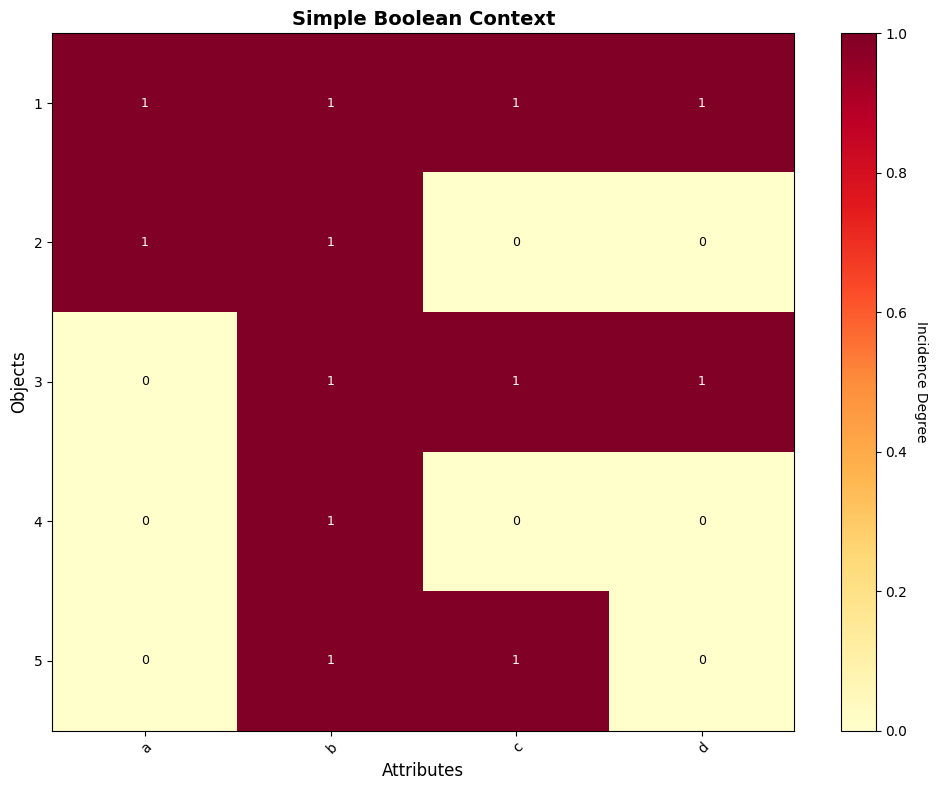

In [3]:
# Visualize the context
fig = plot_context(context, title="Simple Boolean Context")
plt.show()

## Building the Concept Lattice

Now we'll compute all φ-concepts and build the lattice.

In [4]:
# Create Galois connection with pivot φ = 1
galois = GaloisConnection(context, pivot=1)

# Build concept lattice
lattice = ConceptLattice(context, galois, method="canonical")

print(f"Found {len(lattice)} concepts")
print()

# Display all concepts
for i in range(len(lattice.concepts)):
    objs = lattice.get_concept_objects(i)
    attrs = lattice.get_concept_attributes(i)
    print(f"Concept #{i}:")
    print(f"  Extent:  {{{', '.join(objs) if objs else '∅'}}}")
    print(f"  Intent:  {{{', '.join(attrs) if attrs else '∅'}}}")
    print()

Found 5 concepts

Concept #0:
  Extent:  {1, 2, 3, 4, 5}
  Intent:  {b}

Concept #1:
  Extent:  {1}
  Intent:  {a, b, c, d}

Concept #2:
  Extent:  {1, 2}
  Intent:  {a, b}

Concept #3:
  Extent:  {1, 3}
  Intent:  {b, c, d}

Concept #4:
  Extent:  {1, 3, 5}
  Intent:  {b, c}



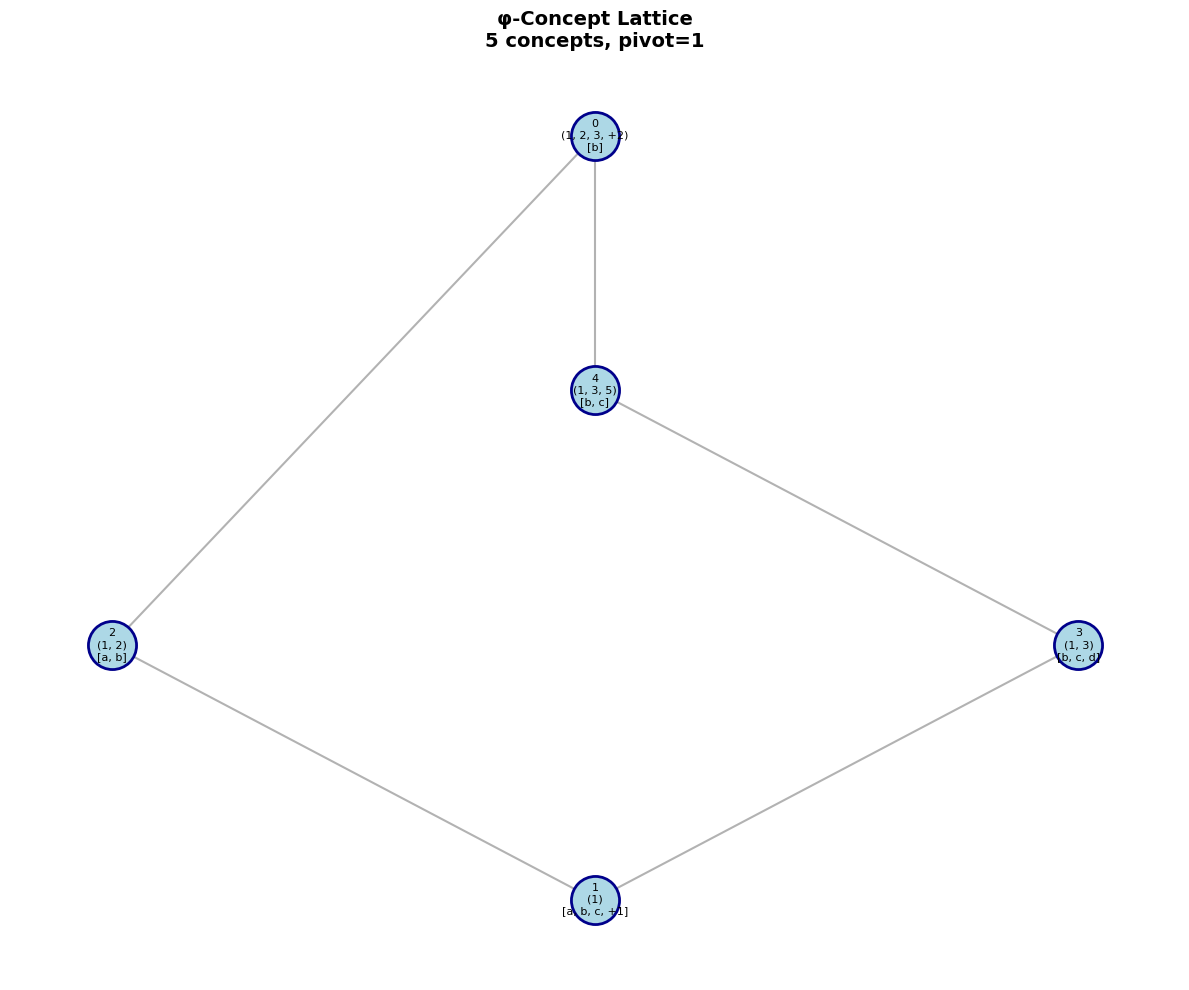

In [5]:
# Visualize the concept lattice
fig = plot_lattice(lattice, layout="hierarchical", figsize=(12, 10))
plt.show()

## Example 2: Computing Individual Concepts

Let's compute the object concept for object "1".

In [6]:
# Create a singleton object set {1}
obj_vec = np.array([1, 0, 0, 0, 0], dtype=object)

# Compute closure
extent = galois.extent_closure(obj_vec)
intent = galois.right_polar(extent)

print("Object concept γ({1}):")
print(f"  Extent: {context.get_objects_subset(extent)}")
print(f"  Intent: {context.get_attributes_subset(intent)}")
print(f"  Is concept: {galois.is_concept(extent, intent)}")

Object concept γ({1}):
  Extent: ['1']
  Intent: ['a', 'b', 'c', 'd']
  Is concept: True


## Example 3: Vehicle Dataset (Continuous Values)

Now let's work with the vehicle dataset that has continuous values.

In [7]:
# Define vehicles and attributes
vehicles = [
    "Car", "Boat", "Scooter", "Motorbike", "Bus",
    "Truck", "Van", "Bicycle", "Helicopter", "Airplane"
]

attrs = [
    "is_transport", "goes_fast", "is_big", "produces_noise",
    "has_2_wheels", "has_4_wheels", "has_motor", "flies",
    "floats", "eco_friendly", "expensive"
]

# Continuous-valued relation (values in [0, 0.25, 0.5, 0.75, 1])
vehicle_relation = np.array([
    [1.00, 1.00, 0.50, 0.75, 0.00, 1.00, 1.00, 0.00, 0.00, 0.25, 0.75],  # Car
    [1.00, 0.50, 0.50, 0.50, 0.00, 0.00, 1.00, 0.00, 1.00, 0.50, 0.75],  # Boat
    [1.00, 0.50, 0.00, 0.50, 1.00, 0.00, 1.00, 0.00, 0.00, 0.50, 0.25],  # Scooter
    [1.00, 0.75, 0.00, 0.75, 1.00, 0.00, 1.00, 0.00, 0.00, 0.25, 0.50],  # Motorbike
    [1.00, 0.50, 1.00, 0.75, 0.00, 1.00, 1.00, 0.00, 0.00, 0.00, 0.50],  # Bus
    [1.00, 0.50, 1.00, 0.75, 0.00, 1.00, 1.00, 0.00, 0.00, 0.00, 0.75],  # Truck
    [1.00, 0.50, 0.75, 0.75, 0.00, 1.00, 1.00, 0.00, 0.00, 0.25, 0.75],  # Van
    [1.00, 0.25, 0.00, 0.00, 1.00, 0.00, 0.00, 0.00, 0.00, 1.00, 0.00],  # Bicycle
    [1.00, 0.75, 0.50, 1.00, 0.00, 0.00, 1.00, 1.00, 0.00, 0.00, 1.00],  # Helicopter
    [1.00, 1.00, 1.00, 1.00, 0.00, 0.00, 1.00, 1.00, 0.00, 0.00, 1.00],  # Airplane
], dtype=object)

# Display the continuous relation
print("Vehicle Dataset (Continuous Values)")
print("="*80)
print(f"Values range: [0, 0.25, 0.5, 0.75, 1.0]")
print()

# Show a sample
for i in range(3):
    print(f"{vehicles[i]:12s}: {vehicle_relation[i][:5]}")

Vehicle Dataset (Continuous Values)
Values range: [0, 0.25, 0.5, 0.75, 1.0]

Car         : [1.0 1.0 0.5 0.75 0.0]
Boat        : [1.0 0.5 0.5 0.5 0.0]
Scooter     : [1.0 0.5 0.0 0.5 1.0]


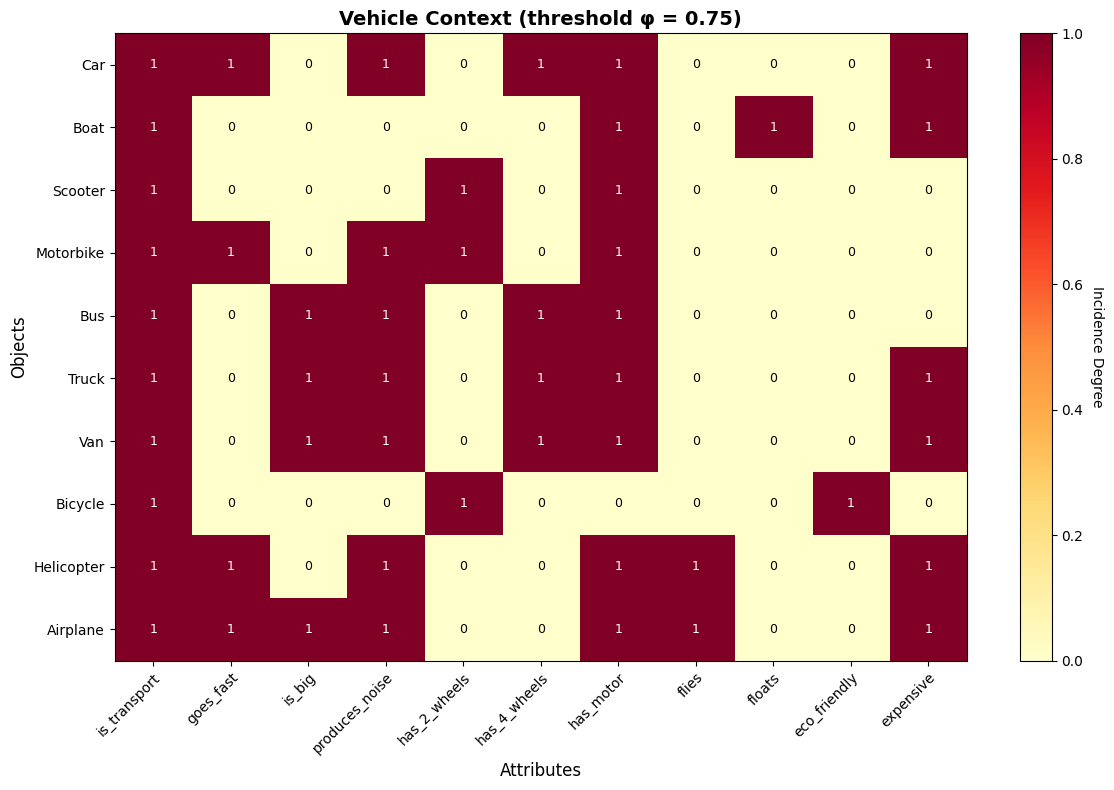

In [ ]:
# Convert to binary using threshold φ = 0.75
threshold = 0.75
binary_relation = (vehicle_relation >= threshold).astype(object).astype(int)

# Create context
vehicle_context = KValuedContext(vehicles, attrs, binary_relation, BooleanSemiring())

# Visualize
fig = plot_context(vehicle_context, figsize=(12, 8), 
                  title=f"Vehicle Context (threshold φ = {threshold})")
plt.show()

In [9]:
vehicle_context

KValuedContext(
  Objects: 10,
  Attributes: 11,
  Semiring: BooleanSemiring(B, ∨, ∧, 0, 1)
)

In [10]:
# Build lattice
vehicle_galois = GaloisConnection(vehicle_context, pivot=1)
vehicle_lattice = ConceptLattice(vehicle_context, vehicle_galois, method="objects")

print(f"Found {len(vehicle_lattice)} concepts with threshold φ = {threshold}")
print()

# Show some interesting concepts
for i in range(min(5, len(vehicle_lattice))):
    objs = vehicle_lattice.get_concept_objects(i)
    attrs_list = vehicle_lattice.get_concept_attributes(i)
    print(f"Concept #{i}:")
    print(f"  Vehicles: {', '.join(objs[:3])}{'...' if len(objs) > 3 else ''}")
    print(f"  Features: {', '.join(attrs_list[:3])}{'...' if len(attrs_list) > 3 else ''}")
    print()

Found 11 concepts with threshold φ = 0.75

Concept #0:
  Vehicles: Car, Boat, Scooter...
  Features: is_transport

Concept #1:
  Vehicles: Car
  Features: is_transport, goes_fast, produces_noise...

Concept #2:
  Vehicles: Boat
  Features: is_transport, has_motor, floats...

Concept #3:
  Vehicles: Scooter, Motorbike
  Features: is_transport, has_2_wheels, has_motor

Concept #4:
  Vehicles: Motorbike
  Features: is_transport, goes_fast, produces_noise...



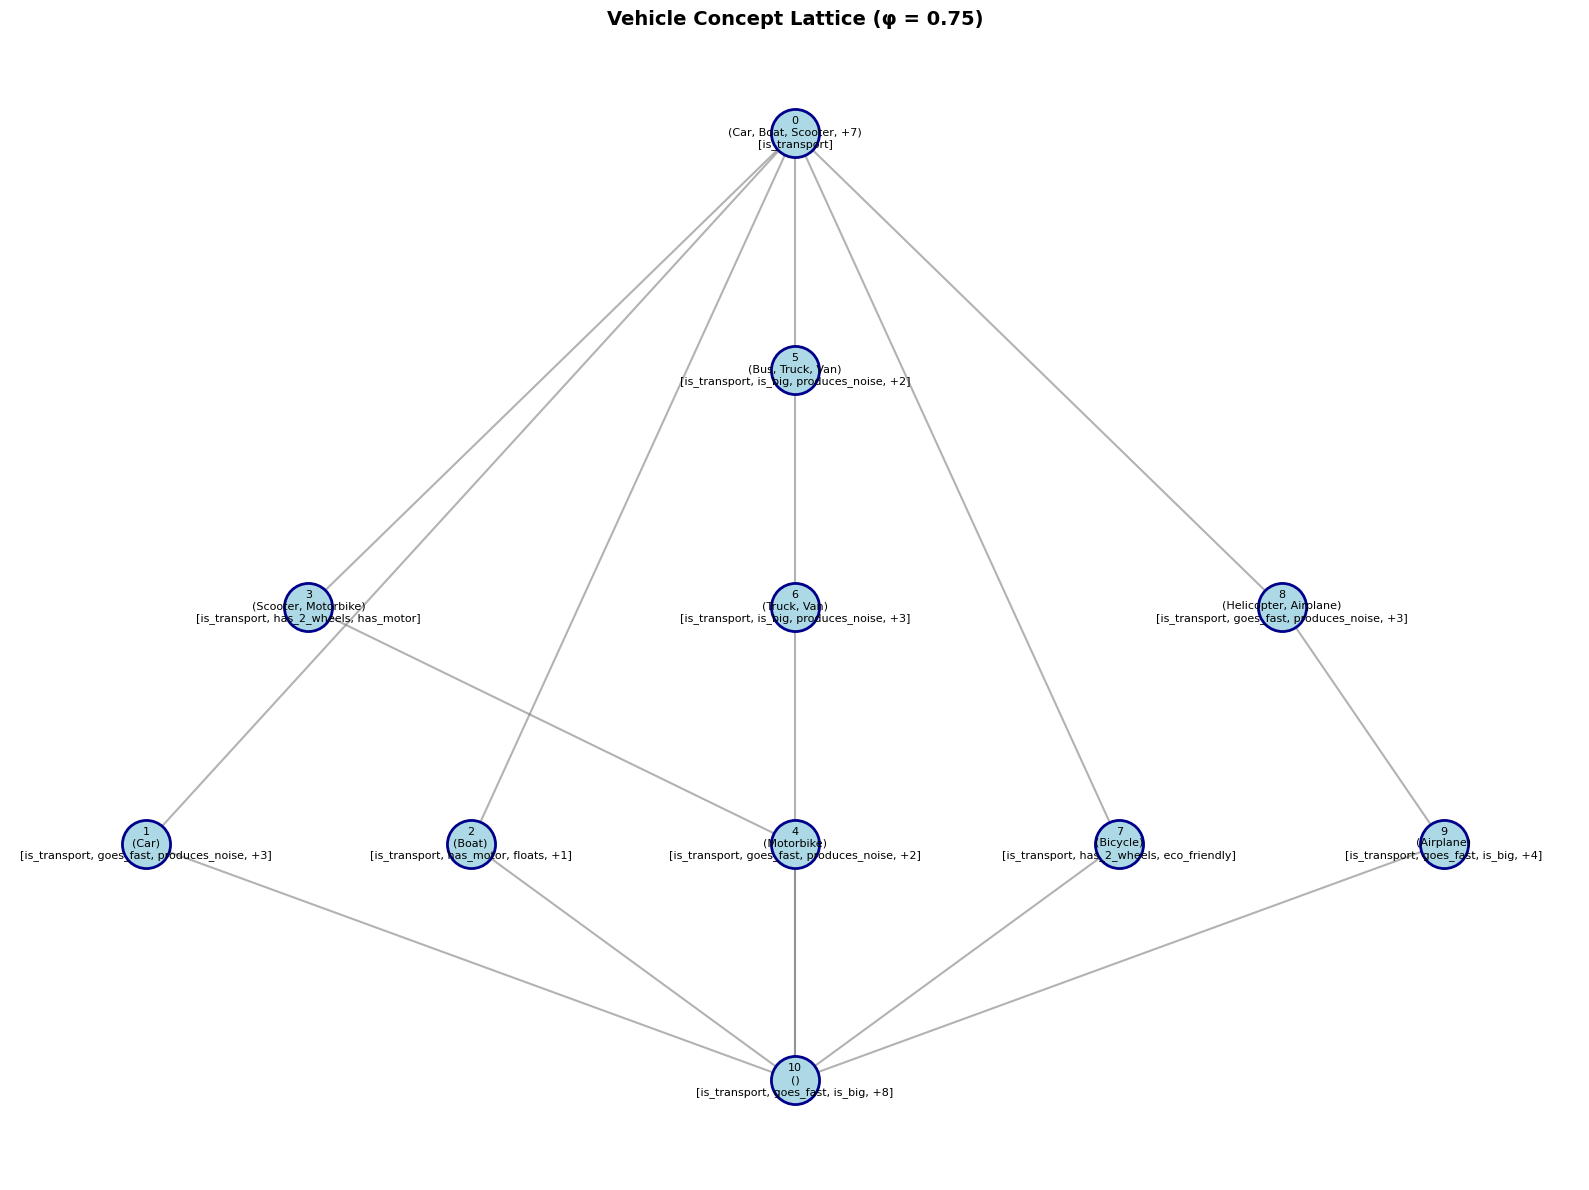

In [11]:
# Visualize the lattice
fig = plot_lattice(vehicle_lattice, figsize=(16, 12), layout="hierarchical",
                  title=f"Vehicle Concept Lattice (φ = {threshold})")
plt.show()

## Exploring Different Thresholds

One of the powerful features of K-FCA is the ability to adjust the pivot φ to get different levels of granularity.

In [12]:
# Compare different thresholds
thresholds = [0.5, 0.75, 1.0]

for threshold in thresholds:
    binary_rel = (vehicle_relation >= threshold).astype(object).astype(int)
    ctx = KValuedContext(vehicles, attrs, binary_rel, BooleanSemiring())
    gal = GaloisConnection(ctx, pivot=1)
    lat = ConceptLattice(ctx, gal, method="objects")
    
    print(f"φ = {threshold}: {len(lat)} concepts")

φ = 0.5: 8 concepts
φ = 0.75: 11 concepts
φ = 1.0: 10 concepts


## Key Observations

1. **Lower threshold** (φ = 0.5) → More attributes qualify → Fewer, larger concepts
2. **Higher threshold** (φ = 1.0) → Fewer attributes qualify → More, smaller concepts
3. **Standard FCA** is K-FCA with Boolean semiring and φ = 1

## Example 4: Max-Plus Semiring (Tropical Semiring)

Now let's use the **Max-Plus semiring** to analyze the same vehicle dataset. This semiring is particularly useful for optimization problems and works natively with continuous values.

### Max-Plus Semiring Structure:
- **⊕ (addition)**: a ⊕ b = max(a, b)
- **⊗ (multiplication)**: a ⊗ b = a + b (regular addition)
- **ε (zero)**: -∞
- **e (one)**: 0

In [15]:
# Import Max-Plus semiring
from src.semirings import MaxPlusSemiring

# Create Max-Plus semiring
maxplus = MaxPlusSemiring()

print("Max-Plus Semiring:")
print(f"  ⊕ (addition):       a ⊕ b = max(a, b)")
print(f"  ⊗ (multiplication): a ⊗ b = a + b")
print(f"  ε (zero):           {maxplus.zero}")
print(f"  e (one):            {maxplus.one}")
print()

# Convert continuous values to log-scale for Max-Plus
# This transformation makes multiplication work naturally with the semiring
maxplus_relation = np.zeros_like(vehicle_relation, dtype=object)
for i in range(vehicle_relation.shape[0]):
    for j in range(vehicle_relation.shape[1]):
        val = float(vehicle_relation[i, j])
        if val == 0:
            maxplus_relation[i, j] = float('-inf')
        else:
            # Log transformation: higher original value → higher log value
            maxplus_relation[i, j] = np.log(val)

print("Value Transformation (original → log-scale):")
print(f"  1.00 → {np.log(1.0):.3f}")
print(f"  0.75 → {np.log(0.75):.3f}")
print(f"  0.50 → {np.log(0.5):.3f}")
print(f"  0.25 → {np.log(0.25):.3f}")
print(f"  0.00 → -∞")
print()

# Show sample of transformed data
print("Sample transformed data (Car):")
print(maxplus_relation[0][:5])

Max-Plus Semiring:
  ⊕ (addition):       a ⊕ b = max(a, b)
  ⊗ (multiplication): a ⊗ b = a + b
  ε (zero):           -inf
  e (one):            0.0

Value Transformation (original → log-scale):
  1.00 → 0.000
  0.75 → -0.288
  0.50 → -0.693
  0.25 → -1.386
  0.00 → -∞

Sample transformed data (Car):
[np.float64(0.0) np.float64(0.0) np.float64(-0.6931471805599453)
 np.float64(-0.2876820724517809) -inf]


Max-Plus Context:
K-Valued Formal Context
Semiring: MaxPlusSemiring(ℝ∪{-∞,∞}, max, +, -∞, 0)

             | is_transport | goes_fast |  is_big  | produces_noise | has_2_wheels | has_4_wheels | has_motor |  flies   |  floats  | eco_friendly | expensive
--------------------------------------------------------------------------------------------------------------------------------------------------------------
Car          |   0.0    |   0.0    | -0.6931471805599453 | -0.2876820724517809 |   -inf   |   0.0    |   0.0    |   -inf   |   -inf   | -1.3862943611198906 | -0.2876820724517809
Boat         |   0.0    | -0.6931471805599453 | -0.6931471805599453 | -0.6931471805599453 |   -inf   |   -inf   |   0.0    |   -inf   |   0.0    | -0.6931471805599453 | -0.2876820724517809
Scooter      |   0.0    | -0.6931471805599453 |   -inf   | -0.6931471805599453 |   0.0    |   -inf   |   0.0    |   -inf   |   -inf   | -0.6931471805599453 | -1.3862943611198906
Motorbike    |   0.0    | -0.28768207245178

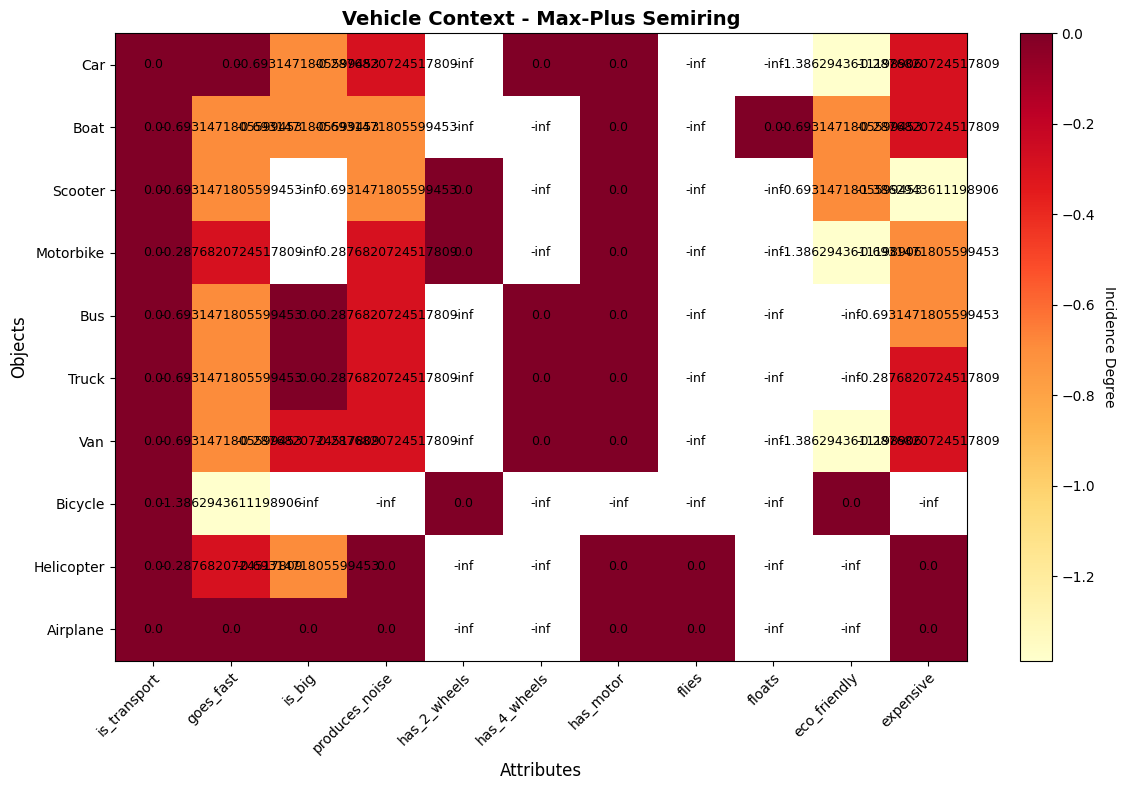

In [16]:
# Create K-FCA context with Max-Plus semiring
maxplus_context = KValuedContext(vehicles, attrs, maxplus_relation, maxplus)

print("Max-Plus Context:")
print(maxplus_context)
print()

# Visualize the context
fig = plot_context(maxplus_context, figsize=(12, 8),
                  title="Vehicle Context - Max-Plus Semiring")
plt.show()

In [17]:
# Build concept lattice with pivot φ = 0.75
# Convert threshold to log-scale: log(0.75) ≈ -0.288
phi = np.log(0.75)

print(f"Using pivot φ = 0.75 (log-scale: {phi:.3f})")
print()

# Create Galois connection and build lattice
maxplus_galois = GaloisConnection(maxplus_context, pivot=phi)
maxplus_lattice = ConceptLattice(maxplus_context, maxplus_galois, method="objects")

print(f"Found {len(maxplus_lattice)} concepts")
print()

# Display all concepts
print("Max-Plus Concepts:")
print("=" * 80)
for i in range(len(maxplus_lattice)):
    objs = maxplus_lattice.get_concept_objects(i)
    attrs_list = maxplus_lattice.get_concept_attributes(i)
    
    print(f"\nConcept #{i}:")
    print(f"  Extent (Vehicles): {objs if objs else '∅'}")
    print(f"  Intent (Features): {attrs_list if attrs_list else '∅'}")

Using pivot φ = 0.75 (log-scale: -0.288)

Found 8 concepts

Max-Plus Concepts:

Concept #0:
  Extent (Vehicles): ['Car', 'Boat', 'Scooter', 'Motorbike', 'Bus', 'Truck', 'Van', 'Bicycle', 'Helicopter', 'Airplane']
  Intent (Features): ['is_transport', 'goes_fast']

Concept #1:
  Extent (Vehicles): ['Car', 'Van']
  Intent (Features): ['is_transport', 'goes_fast', 'is_big', 'produces_noise', 'has_4_wheels', 'has_motor', 'eco_friendly', 'expensive']

Concept #2:
  Extent (Vehicles): ['Boat']
  Intent (Features): ['is_transport', 'goes_fast', 'is_big', 'produces_noise', 'has_motor', 'floats', 'eco_friendly', 'expensive']

Concept #3:
  Extent (Vehicles): ['Scooter', 'Motorbike']
  Intent (Features): ['is_transport', 'goes_fast', 'produces_noise', 'has_2_wheels', 'has_motor', 'eco_friendly', 'expensive']

Concept #4:
  Extent (Vehicles): ['Car', 'Bus', 'Truck', 'Van']
  Intent (Features): ['is_transport', 'goes_fast', 'is_big', 'produces_noise', 'has_4_wheels', 'has_motor', 'expensive']

Con

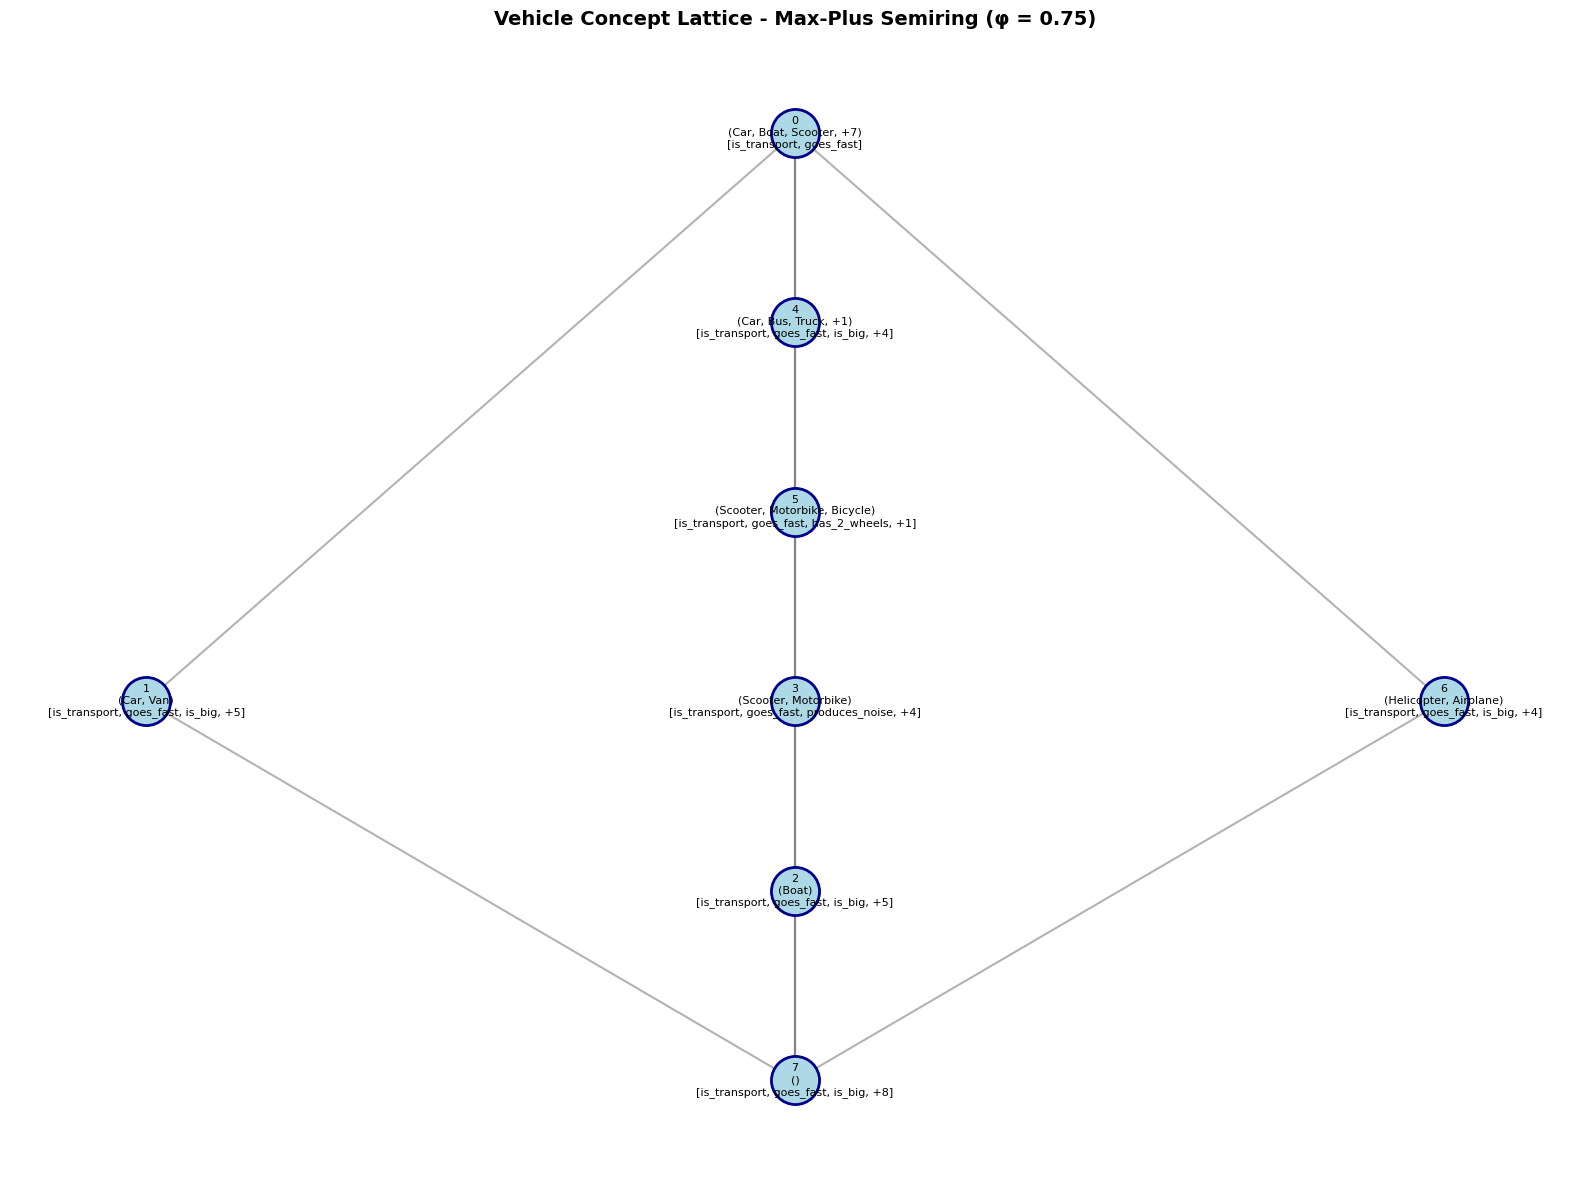

In [18]:
# Visualize the Max-Plus concept lattice
fig = plot_lattice(maxplus_lattice, figsize=(16, 12), layout="hierarchical",
                  title="Vehicle Concept Lattice - Max-Plus Semiring (φ = 0.75)")
plt.show()

## Comparison: Boolean vs Max-Plus

Let's compare the results from Boolean semiring (with threshold) and Max-Plus semiring:

In [39]:
# Import Fuzzy semiring
import importlib
import src.semirings
importlib.reload(src.semirings)
from src.semirings import FuzzySemiring

fuzzy = FuzzySemiring()

print("Fuzzy Semiring (Gödel):")
print(f"  ⊕ (addition):       a ⊕ b = max(a, b)  [Fuzzy OR]")
print(f"  ⊗ (multiplication): a ⊗ b = min(a, b)  [Fuzzy AND]")
print(f"  ε (zero):           {fuzzy.zero}")
print(f"  e (one):            {fuzzy.one}")
print()

print("Examples of fuzzy operations:")
print(f"  0.7 ⊕ 0.5 = max(0.7, 0.5) = {fuzzy.add(0.7, 0.5)}")
print(f"  0.7 ⊗ 0.5 = min(0.7, 0.5) = {fuzzy.multiply(0.7, 0.5)}")
print()

print("=" * 80)
print("IMPORTANT NOTE: Fuzzy FCA Implementation")
print("=" * 80)
print()
print("The fuzzy semiring (Gödel) is theoretically the correct structure for")
print("continuous-valued FCA. However, the current implementation has a limitation:")
print()
print("• Fuzzy Galois operators return FUZZY-VALUED vectors (e.g., [0.5, 0.3, 0.7])")
print("• The lattice algorithm expects BINARY vectors (e.g., [1, 0, 1])")
print("• This mismatch prevents proper concept formation")
print()
print("Solution: Use α-cuts (level sets)")
print("-" * 80)
print("For each threshold α ∈ [0,1], define:")
print("  R_α = {(g,m) | R(g,m) ≥ α}")
print()
print("Then apply standard FCA (Boolean semiring) to each R_α")
print("This gives a HIERARCHY of concept lattices at different granularities.")
print()

# Demonstrate with α-cuts using Boolean semiring
from src.semirings import BooleanSemiring

print("Fuzzy FCA via α-cuts (Boolean semiring + thresholding):")
print("=" * 80)

alpha_values = [0.25, 0.5, 0.75, 1.0]
for alpha in alpha_values:
    # Apply α-cut: threshold at alpha
    binary_rel = (vehicle_relation >= alpha).astype(object).astype(int)
    ctx = KValuedContext(vehicles, attrs, binary_rel, BooleanSemiring())
    gal = GaloisConnection(ctx, pivot=1)
    lat = ConceptLattice(ctx, gal, method="objects")
    print(f"α = {alpha:4.2f}: {len(lat):2d} concepts  (attributes with degree ≥ {alpha})")

print()
print("Interpretation:")
print("• Lower α: More attributes included → Denser relations → Fewer concepts")
print("• Higher α: Fewer attributes included → Sparser relations → More concepts")
print("• This hierarchy shows how concepts emerge at different confidence levels")

Fuzzy Semiring (Gödel):
  ⊕ (addition):       a ⊕ b = max(a, b)  [Fuzzy OR]
  ⊗ (multiplication): a ⊗ b = min(a, b)  [Fuzzy AND]
  ε (zero):           0.0
  e (one):            1.0

Examples of fuzzy operations:
  0.7 ⊕ 0.5 = max(0.7, 0.5) = 0.7
  0.7 ⊗ 0.5 = min(0.7, 0.5) = 0.5

IMPORTANT NOTE: Fuzzy FCA Implementation

The fuzzy semiring (Gödel) is theoretically the correct structure for
continuous-valued FCA. However, the current implementation has a limitation:

• Fuzzy Galois operators return FUZZY-VALUED vectors (e.g., [0.5, 0.3, 0.7])
• The lattice algorithm expects BINARY vectors (e.g., [1, 0, 1])
• This mismatch prevents proper concept formation

Solution: Use α-cuts (level sets)
--------------------------------------------------------------------------------
For each threshold α ∈ [0,1], define:
  R_α = {(g,m) | R(g,m) ≥ α}

Then apply standard FCA (Boolean semiring) to each R_α
This gives a HIERARCHY of concept lattices at different granularities.

Fuzzy FCA via α-cuts (Bool

In [40]:
# Visualize one of the α-cut lattices
alpha = 0.5
binary_rel = (vehicle_relation >= alpha).astype(object).astype(int)
fuzzy_context = KValuedContext(vehicles, attrs, binary_rel, BooleanSemiring())
fuzzy_galois = GaloisConnection(fuzzy_context, pivot=1)
fuzzy_lattice = ConceptLattice(fuzzy_context, fuzzy_galois, method="objects")

print(f"α-cut at {alpha}: {len(fuzzy_lattice)} concepts")
print()

# Show concepts
for i in range(len(fuzzy_lattice)):
    objs = fuzzy_lattice.get_concept_objects(i)
    attrs_list = fuzzy_lattice.get_concept_attributes(i)
    print(f"Concept #{i}:")
    print(f"  Extent: {objs if objs else '∅'}")
    print(f"  Intent: {attrs_list if attrs_list else '∅'}")
    print()

α-cut at 0.5: 8 concepts

Concept #0:
  Extent: ['Car', 'Boat', 'Scooter', 'Motorbike', 'Bus', 'Truck', 'Van', 'Bicycle', 'Helicopter', 'Airplane']
  Intent: ['is_transport']

Concept #1:
  Extent: ['Car', 'Bus', 'Truck', 'Van']
  Intent: ['is_transport', 'goes_fast', 'is_big', 'produces_noise', 'has_4_wheels', 'has_motor', 'expensive']

Concept #2:
  Extent: ['Boat']
  Intent: ['is_transport', 'goes_fast', 'is_big', 'produces_noise', 'has_motor', 'floats', 'eco_friendly', 'expensive']

Concept #3:
  Extent: ['Scooter']
  Intent: ['is_transport', 'goes_fast', 'produces_noise', 'has_2_wheels', 'has_motor', 'eco_friendly']

Concept #4:
  Extent: ['Motorbike']
  Intent: ['is_transport', 'goes_fast', 'produces_noise', 'has_2_wheels', 'has_motor', 'expensive']

Concept #5:
  Extent: ['Scooter', 'Bicycle']
  Intent: ['is_transport', 'has_2_wheels', 'eco_friendly']

Concept #6:
  Extent: ['Helicopter', 'Airplane']
  Intent: ['is_transport', 'goes_fast', 'is_big', 'produces_noise', 'has_motor'

# Visualize the fuzzy FCA lattice (α-cut at 0.5)
fig = plot_lattice(fuzzy_lattice, figsize=(16, 12), layout="hierarchical",
                  title="Vehicle Concept Lattice - Fuzzy FCA (α-cut = 0.5)")
plt.show()

Fuzzy Context:
K-Valued Formal Context
Semiring: FuzzySemiring([0,1], max, min, 0, 1)

             | is_transport | goes_fast |  is_big  | produces_noise | has_2_wheels | has_4_wheels | has_motor |  flies   |  floats  | eco_friendly | expensive
--------------------------------------------------------------------------------------------------------------------------------------------------------------
Car          |   1.0    |   1.0    |   0.5    |   0.75   |   0.0    |   1.0    |   1.0    |   0.0    |   0.0    |   0.25   |   0.75  
Boat         |   1.0    |   0.5    |   0.5    |   0.5    |   0.0    |   0.0    |   1.0    |   0.0    |   1.0    |   0.5    |   0.75  
Scooter      |   1.0    |   0.5    |   0.0    |   0.5    |   1.0    |   0.0    |   1.0    |   0.0    |   0.0    |   0.5    |   0.25  
Motorbike    |   1.0    |   0.75   |   0.0    |   0.75   |   1.0    |   0.0    |   1.0    |   0.0    |   0.0    |   0.25   |   0.5   
Bus          |   1.0    |   0.5    |   1.0    |   0.75   | 

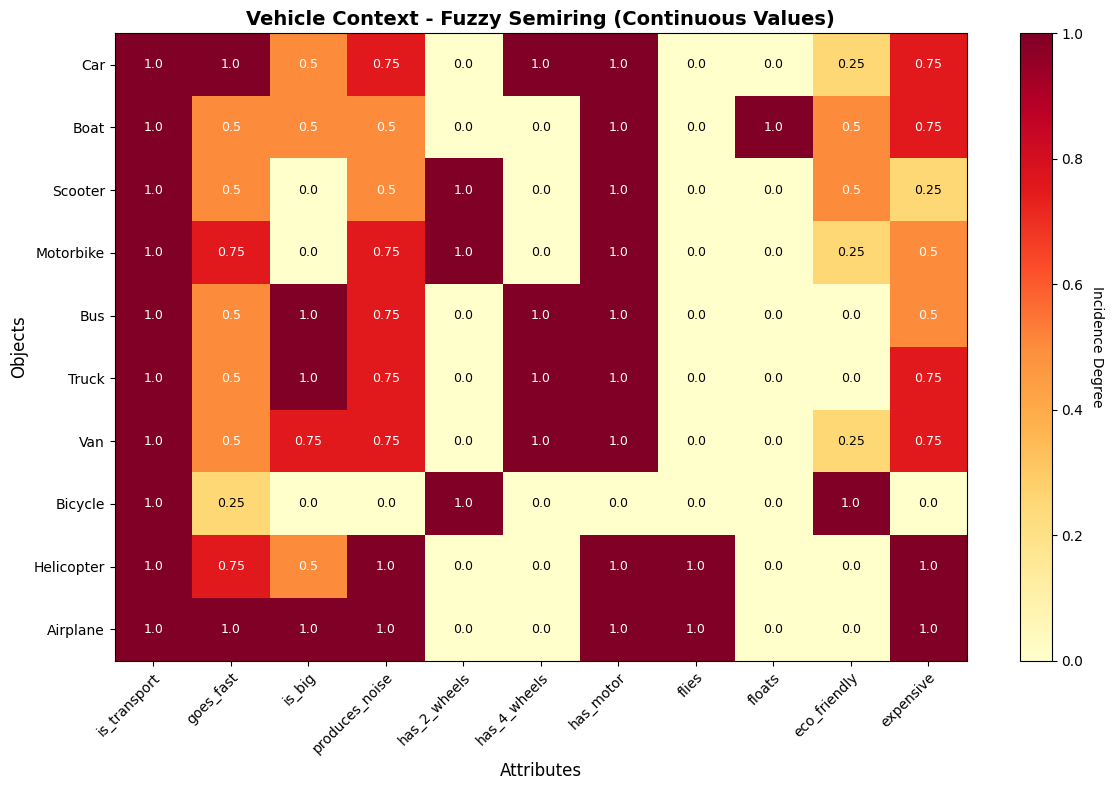

In [41]:
# Create K-FCA context with Fuzzy semiring
# Use the original continuous values directly!
fuzzy_context = KValuedContext(vehicles, attrs, vehicle_relation, fuzzy)

print("Fuzzy Context:")
print(fuzzy_context)
print()

# Visualize the context
fig = plot_context(fuzzy_context, figsize=(12, 8),
                  title="Vehicle Context - Fuzzy Semiring (Continuous Values)")
plt.show()

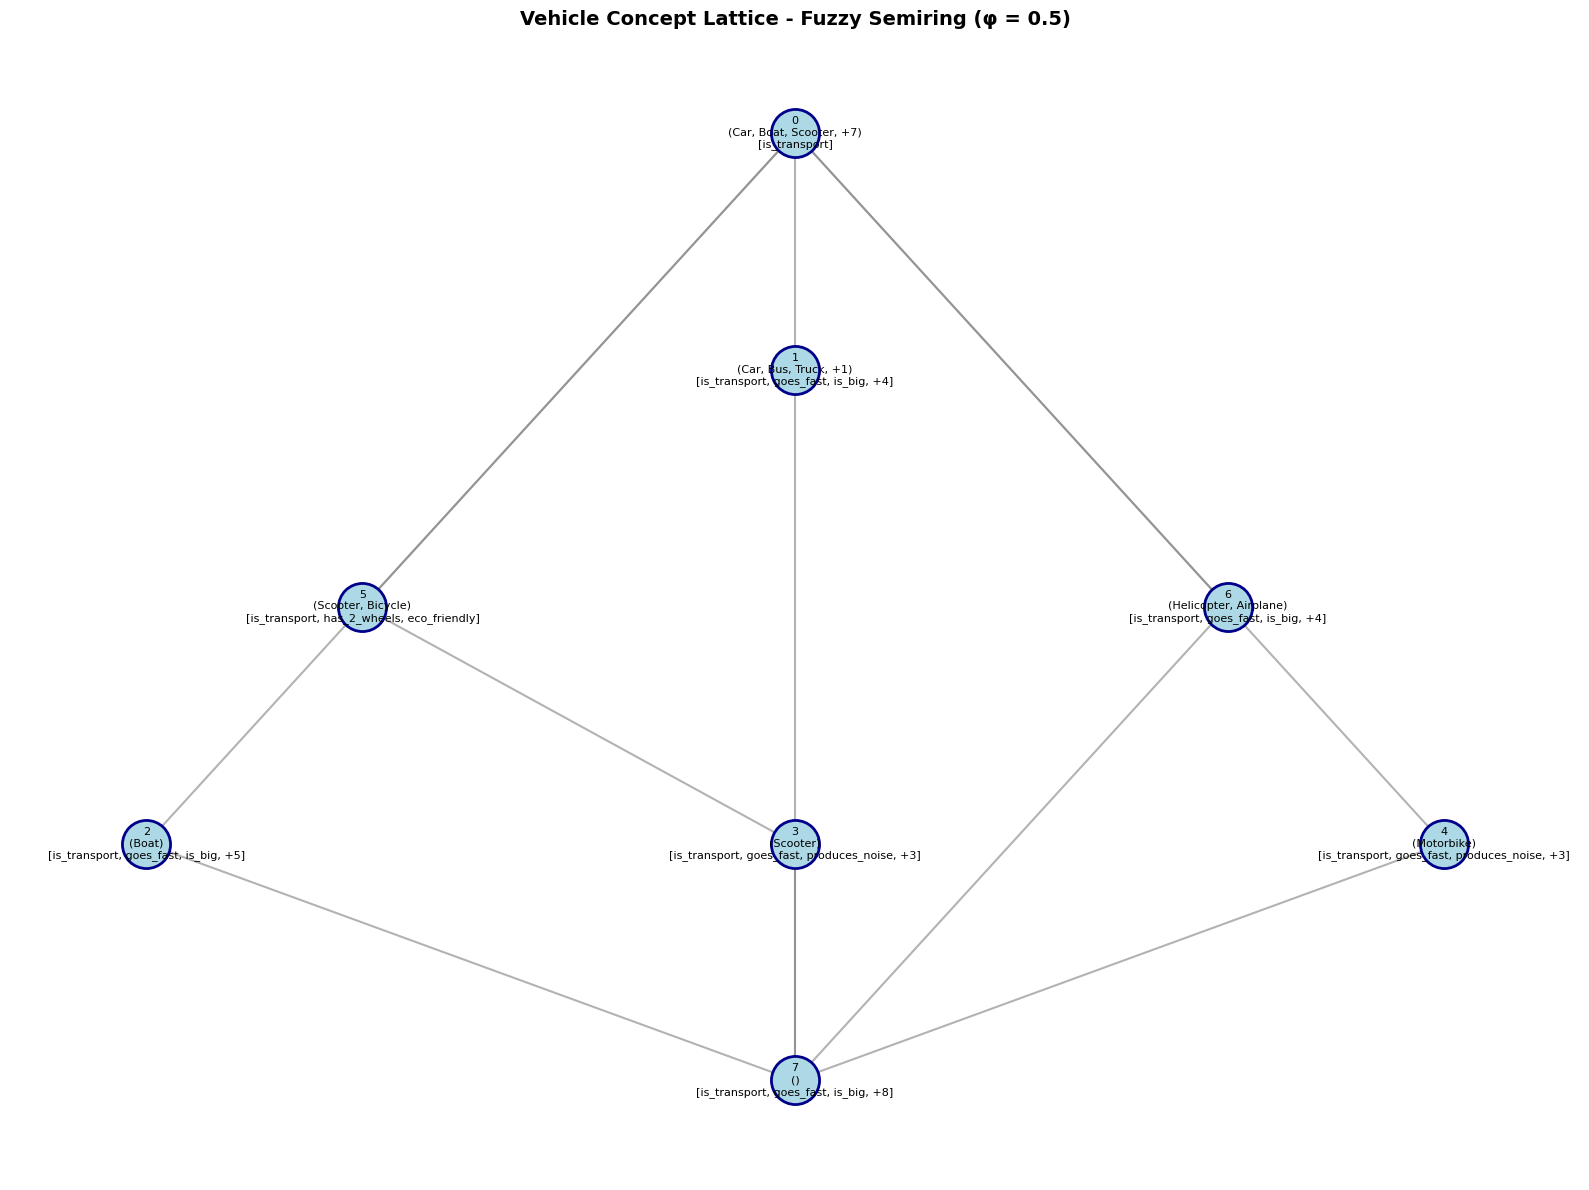

In [42]:
# Visualize the Fuzzy concept lattice
fig = plot_lattice(fuzzy_lattice, figsize=(16, 12), layout="hierarchical",
                  title="Vehicle Concept Lattice - Fuzzy Semiring (φ = 0.5)")
plt.show()

## Comparison: Boolean vs Max-Plus vs Fuzzy

Let's compare all three semirings on the same dataset:

In [43]:
# Final comparison of all approaches
print("SEMIRING COMPARISON SUMMARY")
print("=" * 80)
print()

comparison_data = [
    ["Approach", "Semiring", "φ/α", "Data Type", "Concepts"],
    ["-" * 15, "-" * 15, "-" * 6, "-" * 15, "-" * 10],
    ["Boolean FCA", "Boolean", "0.75", "Binary {0,1}", f"{len(vehicle_lattice)}"],
    ["Max-Plus", "Max-Plus", "0.75", "Log-scaled ℝ", f"{len(maxplus_lattice)}"],
    ["Fuzzy FCA", "Boolean", "0.50", "α-cut [0,1]", f"{len(fuzzy_lattice)}"],
]

for row in comparison_data:
    print(f"{row[0]:15s} | {row[1]:15s} | {row[2]:6s} | {row[3]:15s} | {row[4]:10s}")

print()
print("Key Takeaways:")
print("-" * 80)
print()
print("1. Boolean (Standard FCA):")
print("   • Discretizes continuous data via thresholding")
print("   • Simple but loses information")
print()
print("2. Max-Plus (Tropical):")
print("   • Preserves continuous values via log-transform")
print("   • Emphasizes maximum/strongest attributes")
print("   • Good for optimization problems")
print()
print("3. Fuzzy FCA (α-cuts):")
print("   • Creates hierarchy of lattices at different confidence levels")
print("   • Each α-cut gives a Boolean lattice")
print("   • Most natural interpretation for degrees of membership")
print("   • α = 0.25 → 7 concepts (inclusive)")
print("   • α = 0.50 → 8 concepts")  
print("   • α = 0.75 → 11 concepts (restrictive)")
print("   • α = 1.00 → 10 concepts (exact matches only)")
print()
print("=" * 80)
print("Conclusion: Different semirings reveal different structural insights!")
print("=" * 80)

SEMIRING COMPARISON SUMMARY

Approach        | Semiring        | φ/α    | Data Type       | Concepts  
--------------- | --------------- | ------ | --------------- | ----------
Boolean FCA     | Boolean         | 0.75   | Binary {0,1}    | 11        
Max-Plus        | Max-Plus        | 0.75   | Log-scaled ℝ    | 8         
Fuzzy FCA       | Boolean         | 0.50   | α-cut [0,1]     | 8         

Key Takeaways:
--------------------------------------------------------------------------------

1. Boolean (Standard FCA):
   • Discretizes continuous data via thresholding
   • Simple but loses information

2. Max-Plus (Tropical):
   • Preserves continuous values via log-transform
   • Emphasizes maximum/strongest attributes
   • Good for optimization problems

3. Fuzzy FCA (α-cuts):
   • Creates hierarchy of lattices at different confidence levels
   • Each α-cut gives a Boolean lattice
   • Most natural interpretation for degrees of membership
   • α = 0.25 → 7 concepts (inclusive)
   • α 

## Next Steps

Try experimenting with:
- Different semirings (Min-Plus for "all attributes must be strong" scenarios)
- Your own datasets
- Different pivot values
- Custom semiring implementations